In [76]:
import numpy as np
import matplotlib.pyplot as plt


#Keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical

In [198]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Let's Get a feel for training and testing data
getting a feel for the data is very important so you know how to work with it. We've randomly initialized some numbers and print their values. It's also important to note how the outputs are stored (are they one-hot encoded) or printed in base ten in a normal array. Clarifying through this well help us better understand our data and see what possible conversions we may have to do!

Random Index: 14418
Shape of image: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  39 226 154  38   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 136 252 252 205   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 213 252 252 162   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 122 246 252 235  54   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 226 252 252  93   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  

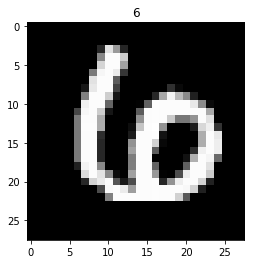

In [262]:
randomIndx = np.random.randint(60000)

print("Random Index: {}".format(randomIndx))
plt.imshow(x_train[randomIndx], cmap = 'gray')
plt.title(y_train[randomIndx])
print("Shape of image: {}".format(np.shape(x_train[randomIndx])))

print(x_train[randomIndx])

# randomIndx = np.random.randint(10000)

### We should note a couple things:
1. Size of the images ar (28,28). Note the single channel. There are no 3 Dimensions. Knowing this will be helpful when we set up our Network.
2. The outputs ( _y_test_ and _y_train_) are both column arrays that contain the VALUE of the output. This is helpful because now we know how to manage conversion of this data (if we have to ... we haven't made that decision yet).

### Lets plot it

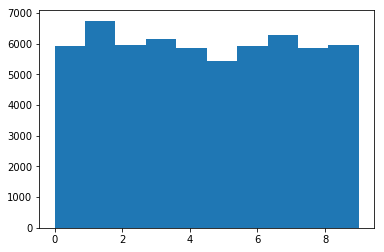

In [54]:
plt.hist(y_train)
plt.show()

# Final Manipulation to Data
We know the data in y_train and y_test are encoded with the values themselves. We'll have to convert this into a matrix that represents which value it is. It's currently has the shape (60000,1) with each row representing a value. What we want, and more specifically what TensorFlow wants is a matrix of the shape (60000,10). In each row, one column will have a 1, and that column represents which number it is.

In [59]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [64]:
y_train = to_categorical(y = y_train, num_classes = 10)

In [66]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

y_train is now encoded in a one-hot format. Instead of y_train[0] = 5, it is now y_train = [0,0,0,0,0,1,0,0,0,0]. The sixth element is lit up, so that represents the number 5 (again, zero-indexed)!

We have to tell Keras the dimensions we'll be iputting, so we define that with the numShape variable. We remove the first index, because that's not the actual SHAPE of the inputs. 

In [84]:
inputShape = np.shape(x_train)
inputShape = (inputShape[1], inputShape[2], 1)
inputShape

(28, 28, 1)

# Build the ConvNet

In [85]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               102500    
__________

In [87]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [88]:
model.fit(x_train, y_train, epochs = 10, batch_size = 1000)

ValueError: Error when checking input: expected conv2d_8_input to have 4 dimensions, but got array with shape (60000, 28, 28)

oops! I think we may have to add a dimension to let Keras know what to expect. Let's try fixing that.

In [92]:
x_train = np.expand_dims(x_train, axis = 3)

In [93]:
np.shape(x_train)

(60000, 28, 28, 1)

Seems better now ... I think we just had to specify to Keras that _x_train_ only has 1 channel. That addition should fix it. Let's try it now!

In [94]:
model.fit(x_train, y_train, epochs = 10, batch_size = 1000)

Epoch 1/10
60000/60000 [==============================] - 39s 648us/step - loss: 10.4201 - acc: 0.3453
Epoch 2/10
60000/60000 [==============================] - 39s 645us/step - loss: 9.8047 - acc: 0.3886
Epoch 3/10
60000/60000 [==============================] - 37s 620us/step - loss: 5.5528 - acc: 0.5855
Epoch 4/10
60000/60000 [==============================] - 37s 613us/step - loss: 0.1894 - acc: 0.9427
Epoch 5/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.1073 - acc: 0.9667
Epoch 6/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.0781 - acc: 0.9761
Epoch 7/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.0670 - acc: 0.9802
Epoch 8/10
60000/60000 [==============================] - 37s 617us/step - loss: 0.0557 - acc: 0.9829
Epoch 9/10
60000/60000 [==============================] - 37s 619us/step - loss: 0.0475 - acc: 0.9846
Epoch 10/10
60000/60000 [==============================] - 37s 621us/step - loss:

# Let's see how we did on a Test Set of data
- before we can do that, we must also convert our _y_test_ label into the same format as _y_train_ ... which is one-hot encoded
- we must also add another dimension to x_train

In [124]:
x_test = np.expand_dims(x_test, axis = 3)
y_test = to_categorical(y_test, num_classes = 10)

We can now proceed to evaluate our model on training set

In [131]:
predictions = model.predict_classes(x_test)

In [128]:
print("y_train shape: {}".format(np.shape(y_train)))
print("x_train shape: {}".format(np.shape(x_train)))

print("y_test shape: {}".format(np.shape(y_test)))
print("x_test shape: {}".format(np.shape(x_test)))
    

y_train shape: (60000,)
x_train shape: (60000, 28, 28)
y_test shape: (10000, 10)
x_test shape: (10000, 28, 28, 1)


In [167]:
evaluate = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 261us/step


oops! Looks like for some reason we don't need to conver the y_test to one-hot encoded. Let's reassign y_test

In [168]:
print("Loss: {}".format(evaluate[0]))
print("Accuracy: {}".format(evaluate[1]))

Loss: 0.039771064763779576
Accuracy: 0.9876


### Let's see how we did in comparison to prediction

In [186]:
print(predictions)
tempList = []

#this loop iterates through y_test and converts a format so we can compare to our predictions
for row in y_test:
    tempClass = np.argmax(row)
    tempList.append(tempClass)


y_testClasses = np.array(tempList)
print(y_testClasses)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [195]:
wrongPredictionIndexes = []
i = 0

for actual, prediction in zip(y_testClasses, predictions):
    if actual != prediction:
        wrongPredictionIndexes.append(i)
    i = i + 1

In [210]:
wrongPredictionIndexes
# print(len(wrongPredictionIndexes))

[62,
 104,
 321,
 445,
 449,
 543,
 582,
 583,
 674,
 684,
 726,
 813,
 882,
 938,
 947,
 965,
 1014,
 1039,
 1062,
 1112,
 1182,
 1226,
 1232,
 1247,
 1260,
 1299,
 1319,
 1364,
 1393,
 1414,
 1425,
 1611,
 1621,
 1681,
 1709,
 1790,
 1878,
 1901,
 2035,
 2043,
 2129,
 2130,
 2135,
 2185,
 2293,
 2308,
 2387,
 2454,
 2462,
 2597,
 2654,
 2742,
 2896,
 2927,
 2953,
 2995,
 3225,
 3384,
 3422,
 3475,
 3520,
 3597,
 3702,
 3727,
 3730,
 3767,
 3780,
 3808,
 3850,
 3941,
 3951,
 3985,
 4078,
 4176,
 4224,
 4289,
 4497,
 4505,
 4536,
 4639,
 4740,
 4761,
 4823,
 4838,
 4860,
 4956,
 5457,
 5634,
 5734,
 5749,
 5937,
 5955,
 6065,
 6071,
 6081,
 6091,
 6101,
 6112,
 6157,
 6172,
 6173,
 6555,
 6571,
 6572,
 6597,
 6625,
 6651,
 6740,
 6783,
 7434,
 7928,
 8059,
 8094,
 8408,
 8527,
 9009,
 9638,
 9642,
 9664,
 9679,
 9692,
 9698,
 9729,
 9839]

[115  92]


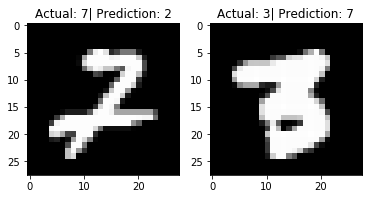

In [263]:
randomIntList = np.random.randint(len(wrongPredictionIndexes), size = 2)
print(randomIntList)

plot = 1
plt.figure()
for randomNum in randomIntList:
    plt.subplot(1,len(randomIntList),plot)
    imageIndex = wrongPredictionIndexes[randomNum]
    plt.imshow(x_test[imageIndex], cmap = 'gray')
    plt.title("Actual: " + str(y_test[imageIndex]) + "| Prediction: " + str(predictions[imageIndex]))
        
    plot = plot + 1